In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gp

%matplotlib inline

This code is to clarify what are pd, plt and gp, which are use to create dataframe and make bar graph and heat map.

In [5]:
park = pd.read_csv('New-Parks.csv', sep =',')
del park['id']
del park['type']
del park['maintenance_responsibility']
del park['image']
del park['council_district']
del park['ward']
del park['tract']
del park['public_works_division']
del park['police_zone']
del park['pli_division']
del park['fire_zone']

print(park)

                        name        neighborhood   latitude  longitude
0             Able Long Park           Beechview  40.408118 -80.028197
1    Albert Turk Graham Park    Crawford-Roberts  40.440507 -79.984018
2                 Alcoa Park         North Shore  40.447481 -80.001017
3          Allegheny Commons    Allegheny Center  40.453126 -80.009158
4     Allegheny Landing Park         North Shore  40.447184 -80.002907
..                       ...                 ...        ...        ...
204           Woods Run Park  Marshall-Shadeland  40.476383 -80.029253
205         Young Field Park  Marshall-Shadeland  40.472963 -80.032768
206              Zulema Park     Central Oakland  40.435693 -79.957048
207       Liberty Green Park        East Liberty  40.462773 -79.919314
208         Esser Plaza Park    South Side Flats  40.428564 -79.986239

[209 rows x 4 columns]


In these code, I inserted the data that include parks' name, neighborhood, latitude and longitude. I deleted all other useless columns to make my dataframe clear. The reason why I keep the latitude and longitude is to make the heat map.

In [6]:
op= pd.read_csv('Old-Parks.csv', sep =',')
del op['objectid_1']
del op['objectid']
del op['acreage']
del op['final_cat']
del op['type']
del op['sector']
del op['origpkname']
del op['alterntnam']
del op['divname']
del op['shape_area']
del op['shape_leng']
del op['globalid']
del op['created_user']
del op['created_date']
del op['last_edited_user']
del op['last_edited_date']
del op['maintenanceresponsibility']
del op['dpw_ac']
del op['globalid_2']
del op['shape_length']
op.columns=op.columns.str.replace('updatepknm', 'name')
op.head()

,sqft,name
0,175418.933019,Alton Park
1,293842.139733,Dunbar Park
2,314514.391164,Frank Curto Park
3,183975.485273,Cowley Park
4,226186.966458,McGonigle Park


In these code, I inserted another data that include the park's name and square footage. In this way I can find which neighborhood has the biggest park area. I deleted all other useless columns. 

In [7]:
np = pd.merge(park, op, on='name')
print(np)

                        name        neighborhood   latitude  longitude  \
0             Able Long Park           Beechview  40.408118 -80.028197   
1    Albert Turk Graham Park    Crawford-Roberts  40.440507 -79.984018   
2                 Alcoa Park         North Shore  40.447481 -80.001017   
3          Allegheny Commons    Allegheny Center  40.453126 -80.009158   
4     Allegheny Landing Park         North Shore  40.447184 -80.002907   
..                       ...                 ...        ...        ...   
200           Woods Run Park  Marshall-Shadeland  40.476383 -80.029253   
201         Young Field Park  Marshall-Shadeland  40.472963 -80.032768   
202              Zulema Park     Central Oakland  40.435693 -79.957048   
203       Liberty Green Park        East Liberty  40.462773 -79.919314   
204         Esser Plaza Park    South Side Flats  40.428564 -79.986239   

             sqft  
0    7.228826e+04  
1    1.662005e+04  
2    2.506040e+04  
3    2.673959e+06  
4    9.9559

In this line, I merged two dataset together based on parks' names, because two dataset both have this in common.

In [16]:
parks = dict()
for index, row in np.iterrows():
    try:
        parks[np.iat[index - 1, 1]] = parks[np.iat[index - 1, 1]] + np.iat[index - 1, 4]
    except:
        parks[np.iat[index - 1, 1]] = np.iat[index - 1, 4]
print(parks)

{'South Side Flats': 797493.92040023, 'Beechview': 669795.72293664, 'Crawford-Roberts': 81089.62230829, 'North Shore': 755694.70278548, 'Allegheny Center': 2783957.22573607, 'Central Business District': 379909.99676126003, 'Central Northside': 40157.14316626, 'East Liberty': 537120.78701639, 'Bedford Dwellings': 352034.49084877, 'South Side Slopes': 3103461.4855487803, 'Lower Lawrenceville': 793990.03510018, 'Banksville': 836855.95778245, 'South Oakland': 181248.88221647, 'Homewood North': 67475.15516742, 'Hazelwood': 788205.77307154, 'Bon Air': 33953.56076913, 'Central Oakland': 80327.39026066, 'Brighton Heights': 1534681.8861377698, 'Brookline': 4779746.041326299, 'Spring Garden': 309161.20811653003, 'Lincoln-Lemington-Belmar': 474570.97800664004, 'Windgap': 267825.86052636, 'Troy Hill': 751694.4140941501, 'Westwood': 157894.12103649002, 'Perry South': 322906.30842506996, 'Homewood West': 18666.48700753, 'Squirrel Hill South': 45427494.89809096, 'Strip District': 362323.43160208, 'Ar

I made a dictionary in this part, it is used to sum up park's area in the same neighborhoods, I set each neighborhood as one "word" in dictionary. and add all the same neighborhood's area together to make this dictionary.

In [17]:
new_np = pd.DataFrame(list(parks.items()), columns = ['Neighborhood', 'Square Footage'])
pd.options.display.float_format = '{:.5f}'.format
new_np = new_np.sort_values(['Square Footage'], ascending=False)
print(new_np.head(20))

           Neighborhood  Square Footage
26  Squirrel Hill South  45427494.89809
49        Highland Park  16684225.50010
45          Perry North  11334386.60673
18            Brookline   4779746.04133
60          Beltzhoover   3491359.91636
9     South Side Slopes   3103461.48555
4      Allegheny Center   2783957.22574
37     Mount Washington   2746407.88242
59             Sheraden   2553909.20225
17     Brighton Heights   1534681.88614
34         Point Breeze   1454082.92518
35            Allentown   1433968.30505
54              Carrick   1399851.58594
48              Elliott   1336541.54272
56        Lincoln Place   1017712.49080
63          Polish Hill    982906.25912
11           Banksville    836855.95778
0      South Side Flats    797493.92040
10  Lower Lawrenceville    793990.03510
14            Hazelwood    788205.77307


I maked a dataframe base on the dataframe and take 5 digits after decimal place as the result of 'Square Footage'. Thank I sort the dataset by the area.

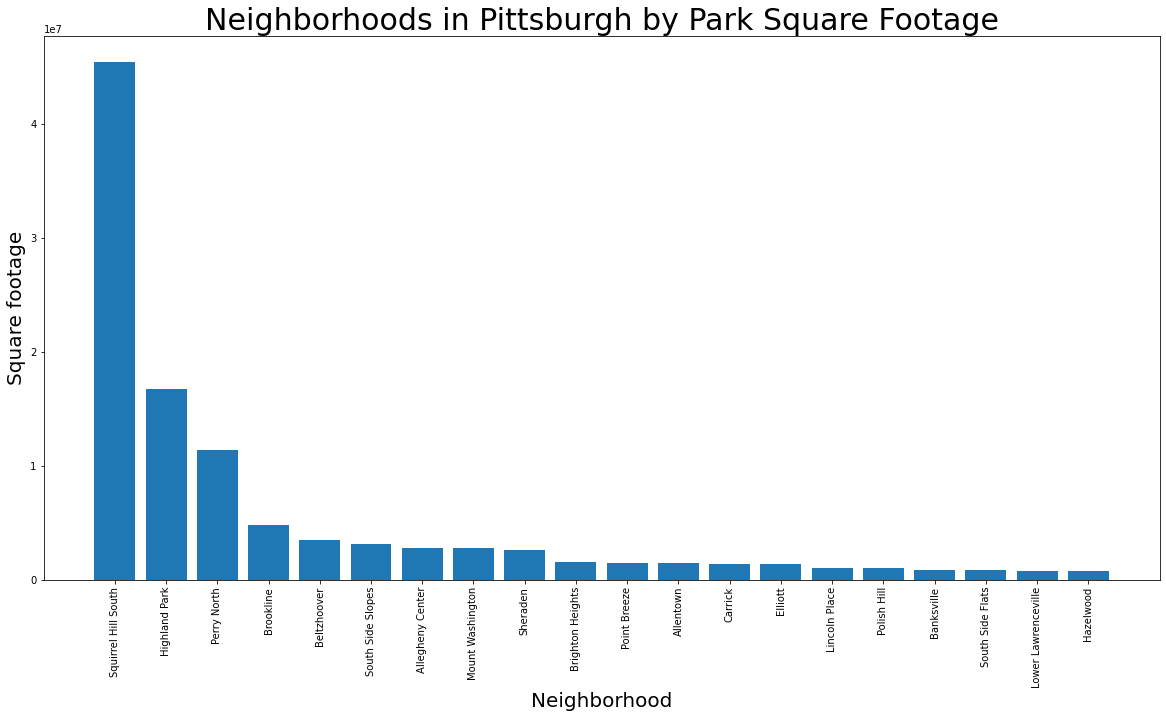

In [18]:
plt.figure(figsize=(20,10))
plt.bar('Neighborhood', 'Square Footage', data=new_np.head(20))
plt.xlabel("Neighborhood", fontsize='20')
plt.ylabel("Square footage", fontsize='20')
plt.title("Neighborhoods in Pittsburgh by Park Square Footage", fontsize ='30')
plt.xticks(rotation=90)
plt.show()

To make the data more visualize, I made a bar graph with first twenty neighborhoods by using plt.. I set the graph size to 20:10. I also give a title to this graph. I label the x and y axis as square footage and neighborhood. In the end I rotate the y axis title to make it looks better. As we can see, Squirrel Hill South has the biggest area of park.

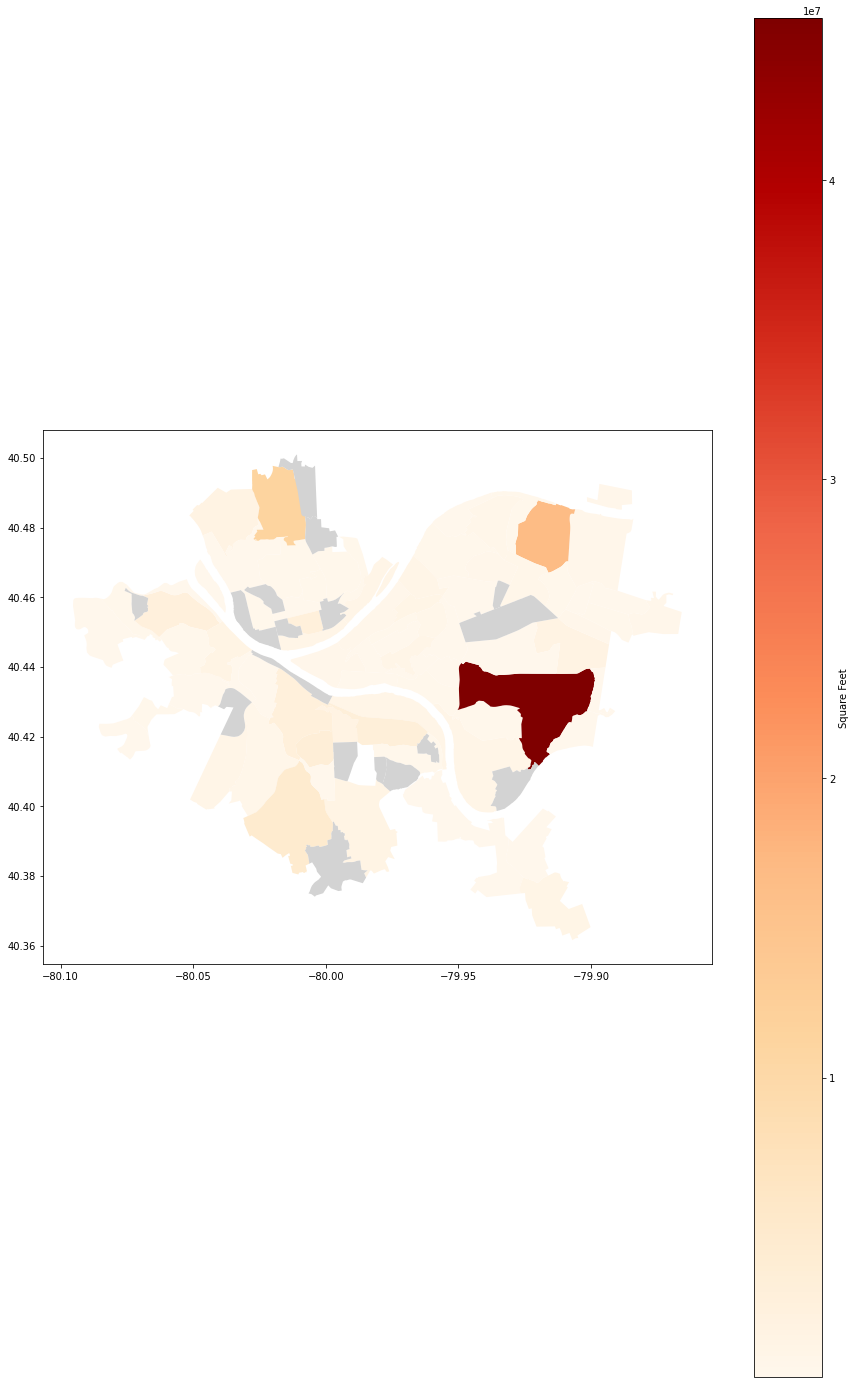

In [19]:
neighborhoods = gp.read_file("Neighborhoods/Neighborhoods_.shp")
area_map = neighborhoods.merge(new_np, how='left', left_on= 'hood', right_on='Neighborhood')
area_map.plot(
    column='Square Footage',
    cmap='OrRd',
    legend=True,
    figsize=(15,25),
    legend_kwds={'label': "Square Feet"},
    missing_kwds={"color": "lightgrey"}
    )

Finally, I make a heat map based on the square footage of parks in different neighborhoods, as we can see, Squirrel Hill South has the most attractive color on the map. It's because both Schenley Park and Frick Park are in Squirrel Hill South.